<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Boxplot for "Median value of owner-occupied homes"

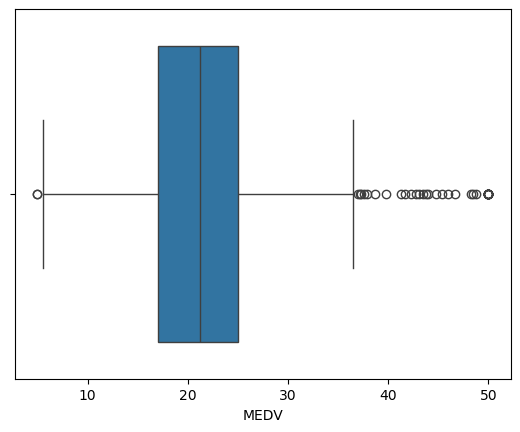

In [6]:
box = sns.boxplot(x = "MEDV", data = boston_df)
pyplot.show()

Explanation - this is a boxplot for Median value of owner occupied homes and it shows us the median number which is around 22, the first quartile which is 18 and the third quartile which is 25. the max number was 36 and the minimum was 4

### Barplot for Charles River Variable (CHAS)

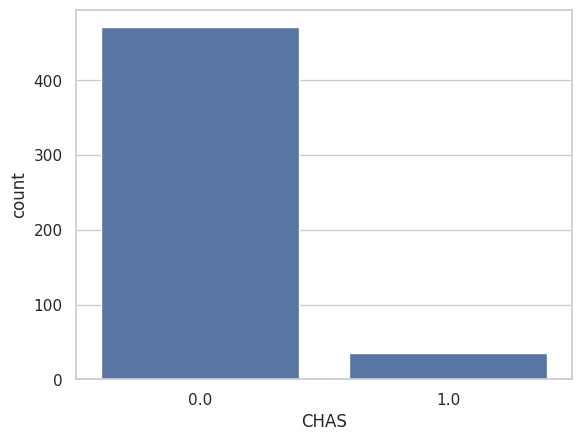

In [7]:
sns.set(style="whitegrid")
bar = sns.countplot(x = "CHAS", data = boston_df)
pyplot.show()

Explanation - this is a barplot of Charles river variable where 1 means the tract bounds the river and 0 otherwise. more than 400 times 0 appeared in the dataset whereas 1 only appeared less than 50 times. 

### Boxplot for MEDV vs AGE 

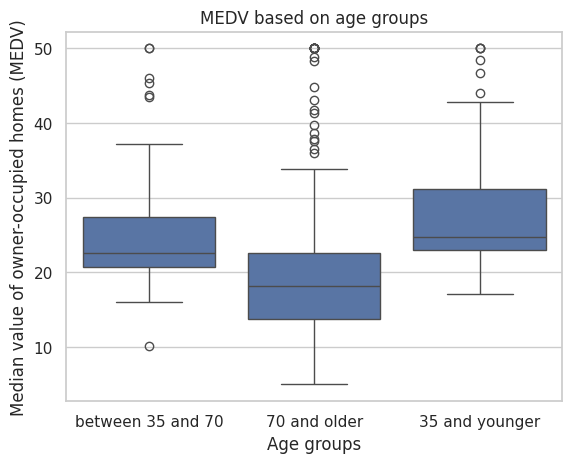

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

sns.boxplot(x='age_group', y= 'MEDV', data=boston_df)
pyplot.title('MEDV based on age groups')
pyplot.xlabel('Age groups')
pyplot.ylabel('Median value of owner-occupied homes (MEDV)')
pyplot.show()


Explanation - these are boxplots comparing the median value of owner-occupied houses and the different age groups. We can see that the group 35 and younger had the highest median at 25 whereas the group 35-70 had 22 and the group above 70 had 18 as the median

### Scatterplot between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)

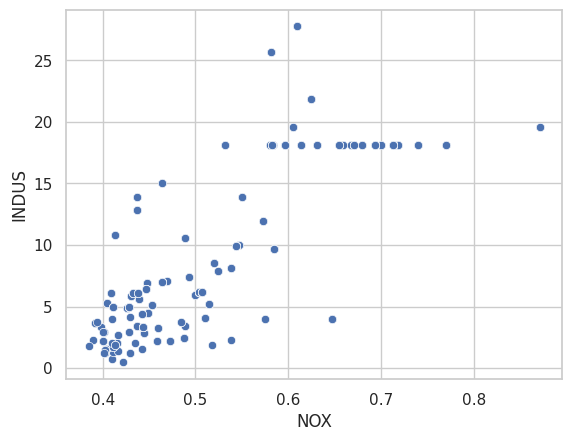

In [9]:
sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
pyplot.show()

Explanation - From the scatterplot we can see that greater the nitric oxide concentration, greater is the proportion of non-retail business acres per town. This shows a positive correlation

### Histogram for pupil to teacher ratio (PTRATIO)

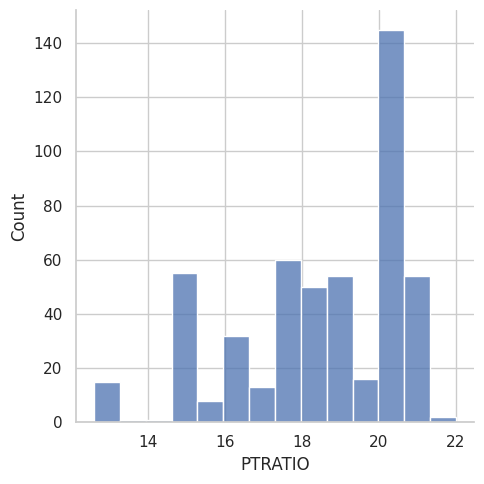

In [10]:
sns.displot(x = boston_df["PTRATIO"], kde = False)
pyplot.show()

Explanation - this is a histogram for the pupil to teacher ratio and the highest pupil to teacher ratio was above 20

## Is there a significant difference in median value of houses bounded by the Charles river or not?

* H_0 = there is no difference in median value of houses bounded by the Charles river 
* H_1 = there is a difference in median value of houses bounded by the Charles river

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Since the p-value is less than alpha value of 0.05, we can reject the null hypothesis as there is enough proof that there is a difference in the median value of houses bounded by the Charles River

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

* H_0 = there is no difference in MEDV for each AGE
* H_1 = there is a difference in MEDV for each AGE

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

thirtyfive_lower = boston_df[boston_df["age_group"] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df["age_group"] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df["age_group"] == '70 years and older']['MEDV']

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion - Since the p-value is less than the alpha value of 0.05, we reject the null hypothesis and prove that there is a difference in median value of houses for each proportion of owner occupied units built prior to 

## Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)?

* H_0 = there is no relationship between NOX and INDUS
* H_1 = there is a relationship between NOX and INDUS

In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion - since the p-value is less than alpha value of 0.05, we reject the null hypothesis and prove that there is a relationship between NOX and INDUS

## What is the impact of an additional weighted distance (DIS) to the five Boston employment centres on the median value of owner occupied homes (MEDV)? 

* H_0 = there is no impact of DIS on MEDV
* H_1 = there is an impact of DIS on MEDV

In [15]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        14:15:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion - since the p-value is less than the alpha value of 0.05, we reject the null hypothesis proving that the additional weighted distance to the five Boston employment centers impacts the median value of owner occupied homes